In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('income.csv')

In [7]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [3]:
from sklearn.cluster import KMeans

In [11]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [12]:
sse

[39748148458.54546,
 3318233941.1619043,
 1577046058.883117,
 814746044.2545456,
 296500418.0952381,
 231967084.46190482,
 175267075.53333333,
 120800257.03333335,
 95133611.78333335]

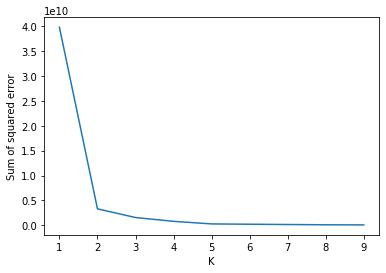

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(df[['Income($)']])
df['SIncome($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['SAge'] = scaler.transform(df[['Age']])

In [17]:
df.head()

,Name,Age,Income($),SIncome($),SAge
0,Rob,27,70000,0.213675,0.058824
1,Michael,29,90000,0.384615,0.176471
2,Mohan,29,61000,0.136752,0.176471
3,Ismail,28,60000,0.128205,0.117647
4,Kory,42,150000,0.897436,0.941176


In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SAge','SIncome($)']])
    sse.append(km.inertia_)

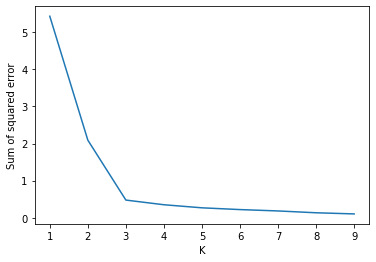

In [21]:
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [22]:
km = KMeans(n_clusters = 3)

In [23]:
df.columns

Index(['Name', 'Age', 'Income($)', 'SIncome($)', 'SAge'], dtype='object')

In [26]:
km.fit_predict(df[['Age', 'Income($)']])

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [29]:
y_pred = km.fit_predict(df[['SAge', 'SIncome($)']])

In [32]:
df["cluster"] = y_pred

In [34]:
# df.drop(["Y_Predicted"],axis=1,inplace=True)
df.head()

,Name,Age,Income($),SIncome($),SAge,cluster
0,Rob,27,70000,0.213675,0.058824,2
1,Michael,29,90000,0.384615,0.176471,2
2,Mohan,29,61000,0.136752,0.176471,2
3,Ismail,28,60000,0.128205,0.117647,2
4,Kory,42,150000,0.897436,0.941176,1


In [52]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [54]:
# plt.scatter(df[df["cluster"] ==0].SAge,df[df["cluster"] ==0]["SIncome($)"],color = "red")
# plt.scatter(df[df["cluster"] ==1].SAge,df[df["cluster"] ==1]["SIncome($)"],color = "green")
# plt.scatter(df[df["cluster"] ==2].SAge,df[df["cluster"] ==2]["SIncome($)"],color = "black")

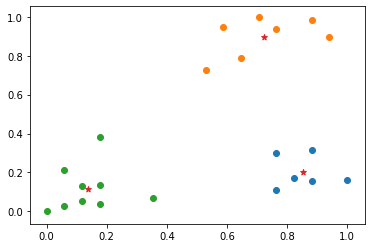

In [59]:
plt.scatter(df[df["cluster"] ==0].SAge,df[df["cluster"] ==0]["SIncome($)"])
plt.scatter(df[df["cluster"] ==1].SAge,df[df["cluster"] ==1]["SIncome($)"])
plt.scatter(df[df["cluster"] ==2].SAge,df[df["cluster"] ==2]["SIncome($)"])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*')